# Python Project: Retail Customer Segmentation with RFM Analysis

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv('/Users/xsp/Desktop/Datasets/online_retail_data.csv'
                      , parse_dates = ['InvoiceDate'])

In [3]:
df.head(20)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-01-12 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-01-12 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-01-12 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-01-12 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-01-12 08:26:00,3.39,17850.0,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-01-12 08:26:00,7.65,17850.0,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-01-12 08:26:00,4.25,17850.0,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,2010-01-12 08:28:00,1.85,17850.0,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,2010-01-12 08:28:00,1.85,17850.0,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-01-12 08:34:00,1.69,13047.0,United Kingdom


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [5]:
df[df.columns].nunique()

InvoiceNo      25900
StockCode       4070
Description     4223
Quantity         722
InvoiceDate    23260
UnitPrice       1630
CustomerID      4372
Country           38
dtype: int64

In [6]:
df.isna().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [7]:
df.dropna(subset = 'CustomerID', inplace = True) 
df.shape

(406829, 8)

In [8]:
df.duplicated().sum()

5225

In [9]:
df.drop_duplicates(keep = 'last', inplace = True)
df.shape

(401604, 8)

In [10]:
df[['Quantity', 'UnitPrice']].describe()

,Quantity,UnitPrice
count,401604.000000,401604.000000
mean,12.183273,3.474064
std,250.283037,69.764035
min,-80995.000000,0.000000
25%,2.000000,1.250000
50%,5.000000,1.950000
75%,12.000000,3.750000
max,80995.000000,38970.000000


In [11]:
df[(df['Quantity'] <= 0) | (df['UnitPrice'] <= 0)].head(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,2010-01-12 09:41:00,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-01-12 09:49:00,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-01-12 10:24:00,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-01-12 10:24:00,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-01-12 10:24:00,0.29,17548.0,United Kingdom


In [12]:
df = df[(df['Quantity'] > 0) & (df['UnitPrice'] > 0)]
df.shape

(392692, 8)

In [13]:
df['SumTotal'] = df['Quantity'] * df['UnitPrice']

In [14]:
avg_basket_size = df.groupby('InvoiceNo')['SumTotal'].sum().mean()
avg_basket_size

479.56016047917126

The average basket size per shopping time is $480.

### Columns Needed for RFM Analysis:
- CustomerID  
- Recency  
- Frequency
- Monetary  

Note: Have to aggregate everything by `CustomerID` field

In [15]:
frequency_df = df.groupby('CustomerID')['InvoiceNo'].nunique()
frequency_df

CustomerID
12346.0     1
12347.0     7
12348.0     4
12349.0     1
12350.0     1
           ..
18280.0     1
18281.0     1
18282.0     2
18283.0    16
18287.0     3
Name: InvoiceNo, Length: 4338, dtype: int64

In [16]:
monetary_df = df.groupby('CustomerID')['SumTotal'].sum()
monetary_df

CustomerID
12346.0    77183.60
12347.0     4310.00
12348.0     1797.24
12349.0     1757.55
12350.0      334.40
             ...   
18280.0      180.60
18281.0       80.82
18282.0      178.05
18283.0     2045.53
18287.0     1837.28
Name: SumTotal, Length: 4338, dtype: float64

In [17]:
recency_df = (df['InvoiceDate'].max() - df.groupby('CustomerID')['InvoiceDate'].max()).dt.days
recency_df

CustomerID
12346.0    326
12347.0     40
12348.0     76
12349.0     19
12350.0    311
          ... 
18280.0    160
18281.0      4
18282.0    216
18283.0     10
18287.0      0
Name: InvoiceDate, Length: 4338, dtype: int64

In [18]:
final_df = pd.merge(recency_df, frequency_df, on = 'CustomerID', how = 'inner')
final_df = pd.merge(final_df, monetary_df, on = 'CustomerID', how = 'inner')
final_df

,InvoiceDate,InvoiceNo,SumTotal
CustomerID,,,
12346.0,326,1,77183.60
12347.0,40,7,4310.00
12348.0,76,4,1797.24
12349.0,19,1,1757.55
12350.0,311,1,334.40
...,...,...,...
18280.0,160,1,180.60
18281.0,4,1,80.82
18282.0,216,2,178.05


In [19]:
final_df.rename(columns = {'InvoiceDate':'Recency',
                           'InvoiceNo':'Frequency',
                           'SumTotal':'Monetary'},
                            inplace = True)
final_df

,Recency,Frequency,Monetary
CustomerID,,,
12346.0,326,1,77183.60
12347.0,40,7,4310.00
12348.0,76,4,1797.24
12349.0,19,1,1757.55
12350.0,311,1,334.40
...,...,...,...
18280.0,160,1,180.60
18281.0,4,1,80.82
18282.0,216,2,178.05


In [20]:
round(final_df.describe(), 2)

,Recency,Frequency,Monetary
count,4338.00,4338.00,4338.00
mean,105.47,4.27,2048.69
std,115.08,7.70,8985.23
min,0.00,1.00,3.75
25%,22.00,1.00,306.48
50%,61.00,2.00,668.57
75%,161.75,5.00,1660.60
max,697.00,209.00,280206.02


**Recency:**  
* Recency values ranges from 0 to 697 days, with average value at 105 days.
* Around 50% of the customers made a purchase within the last 2 months.  

**Frequency:**  
* On average, a customer has shopped on the site 4-5 times in the 2-year period.  
* The most active customer has shopped for 209 times or roughly twice a week.

**Monetary:** 
* The average total spending is $2,049.  
* The value varies from 4 all the way to 280,206. 

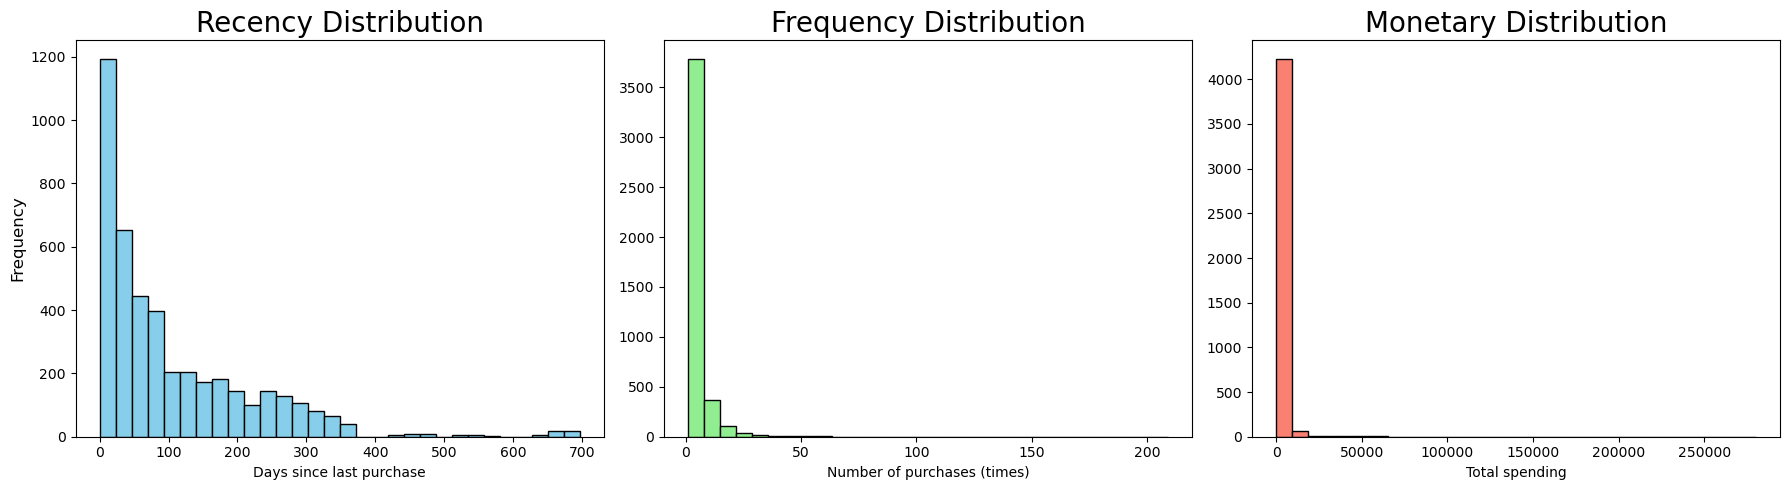

In [21]:
fig, axes = plt.subplots(nrows = 1, ncols = 3, figsize = (18, 5))

# Histogram for Recency
axes[0].hist(final_df['Recency'], bins = 30, color = 'skyblue', edgecolor = 'black')
axes[0].set_title('Recency Distribution', fontsize = 20)
axes[0].set_xlabel('Days since last purchase')
axes[0].set_ylabel('Frequency', fontsize = 12)

# Histogram for Frequency
axes[1].hist(final_df['Frequency'], bins = 30, color = 'lightgreen', edgecolor = 'black')
axes[1].set_title('Frequency Distribution', fontsize = 20)
axes[1].set_xlabel('Number of purchases (times)')

# Histogram for MonetaryValue
axes[2].hist(final_df['Monetary'], bins=30, color='salmon', edgecolor = 'black')
axes[2].set_title('Monetary Distribution', fontsize = 20)
axes[2].set_xlabel('Total spending')

plt.tight_layout()
plt.show()

All histograms above show that the majority of the data is concentrated in the leftmost bin, with a small amount of outliers stretching to the higher ends. This explains

In [22]:
# Removing outliers

Q1 = final_df.quantile(0.25)
Q3 = final_df.quantile(0.75)
IQR = Q3 - Q1

lower_limit = Q1 - (IQR * 1.5)  
upper_limit = Q3 + (IQR * 1.5)

final_df = final_df[(final_df[final_df.columns] >= lower_limit) & (final_df[final_df.columns] <= upper_limit)]
final_df

,Recency,Frequency,Monetary
CustomerID,,,
12346.0,326.0,1.0,NaN
12347.0,40.0,7.0,NaN
12348.0,76.0,4.0,1797.24
12349.0,19.0,1.0,1757.55
12350.0,311.0,1.0,334.40
...,...,...,...
18280.0,160.0,1.0,180.60
18281.0,4.0,1.0,80.82
18282.0,216.0,2.0,178.05


In [23]:
filtered_df = final_df.dropna()
filtered_df

,Recency,Frequency,Monetary
CustomerID,,,
12348.0,76.0,4.0,1797.24
12349.0,19.0,1.0,1757.55
12350.0,311.0,1.0,334.40
12352.0,73.0,8.0,2506.04
12353.0,204.0,1.0,89.00
...,...,...,...
18278.0,74.0,1.0,173.90
18280.0,160.0,1.0,180.60
18281.0,4.0,1.0,80.82


In [24]:
# Quantile grouping

rfm_df = filtered_df.copy()

# Assign score 1 to 5 according to 
rfm_df['RecencyScore'] = pd.qcut(filtered_df['Recency'], 5, labels = [5, 4, 3, 2, 1])
rfm_df['FrequencyScore'] = pd.qcut(filtered_df['Frequency'].rank(method = 'first'), 5, labels = [1, 2, 3, 4, 5])
rfm_df['MonetaryScore'] = pd.qcut(filtered_df['Monetary'], 5, labels = [1, 2, 3, 4, 5])

rfm_df

,Recency,Frequency,Monetary,RecencyScore,FrequencyScore,MonetaryScore
CustomerID,,,,,,
12348.0,76.0,4.0,1797.24,3,4,5
12349.0,19.0,1.0,1757.55,5,1,5
12350.0,311.0,1.0,334.40,1,1,2
12352.0,73.0,8.0,2506.04,3,5,5
12353.0,204.0,1.0,89.00,1,1,1
...,...,...,...,...,...,...
18278.0,74.0,1.0,173.90,3,2,1
18280.0,160.0,1.0,180.60,2,2,1
18281.0,4.0,1.0,80.82,5,2,1


In [25]:
r = pd.to_numeric(rfm_df['RecencyScore'])
f = pd.to_numeric(rfm_df['FrequencyScore'])
m = pd.to_numeric(rfm_df['MonetaryScore'])

rfm_df['RFMScore'] = r + f + m
rfm_df.head(5)

,Recency,Frequency,Monetary,RecencyScore,FrequencyScore,MonetaryScore,RFMScore
CustomerID,,,,,,,
12348.0,76.0,4.0,1797.24,3,4,5,12
12349.0,19.0,1.0,1757.55,5,1,5,11
12350.0,311.0,1.0,334.40,1,1,2,4
12352.0,73.0,8.0,2506.04,3,5,5,13
12353.0,204.0,1.0,89.00,1,1,1,3


In [26]:
rfm_df.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 3785 entries, 12348.0 to 18287.0
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   Recency         3785 non-null   float64 
 1   Frequency       3785 non-null   float64 
 2   Monetary        3785 non-null   float64 
 3   RecencyScore    3785 non-null   category
 4   FrequencyScore  3785 non-null   category
 5   MonetaryScore   3785 non-null   category
 6   RFMScore        3785 non-null   int64   
dtypes: category(3), float64(3), int64(1)
memory usage: 159.6 KB


In [27]:
# Assign groups

def segmentation(x):
    if x > 10:
        return 1
    elif x <= 10 & x > 5:
        return 2
    else:
        return 3
    
# 13, 6, 0
    
rfm_df['Group'] = rfm_df['RFMScore'].apply(segmentation)
rfm_df.head(5)

,Recency,Frequency,Monetary,RecencyScore,FrequencyScore,MonetaryScore,RFMScore,Group
CustomerID,,,,,,,,
12348.0,76.0,4.0,1797.24,3,4,5,12,1
12349.0,19.0,1.0,1757.55,5,1,5,11,1
12350.0,311.0,1.0,334.40,1,1,2,4,3
12352.0,73.0,8.0,2506.04,3,5,5,13,1
12353.0,204.0,1.0,89.00,1,1,1,3,3


In [28]:
rfm_df['Group'].value_counts()

3    1752
1    1391
2     642
Name: Group, dtype: int64

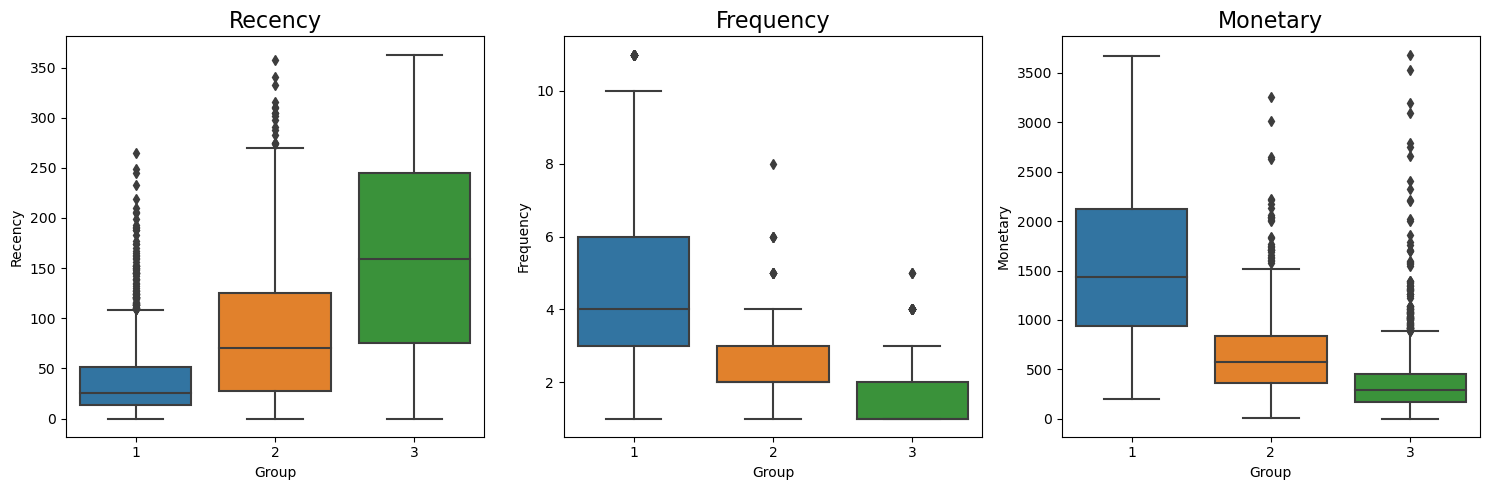

In [29]:
# Boxplot

fig, axs = plt.subplots(nrows = 1, ncols = 3, figsize = (15, 5))

#Boxplot for Recency
sns.boxplot(x ='Group', y = 'Recency', data=rfm_df, ax = axs[0])
axs[0].set_title('Recency', fontsize = 16)

#Boxplot for Frequency
sns.boxplot(x ='Group', y = 'Frequency', data=rfm_df, ax = axs[1])
axs[1].set_title('Frequency', fontsize = 16)


#Boxplot for Monetary
sns.boxplot(x ='Group', y = 'Monetary', data=rfm_df, ax = axs[2])
axs[2].set_title('Monetary', fontsize = 16)


plt.tight_layout()
plt.show()

|  Group | Customer Type  | RFM Characteristics  | Action  |
|---:|---|:---:|:---:|
| 1  | aaaaaaaaaaaaaa  | aaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaa | aaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaa  |
| 2  | aaaaaaaaaaaaaa  | aaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaa  | aaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaa  |
| 3  | aaaaaaaaaaaaaa  | aaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaa  | aaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaa  |